In [32]:
from conditions import DirectTaskCondition, InverseTaskCondition
from models import ModelWithMeasure
from solvers import DirectTaskSolverRK45, InverseTaskSolverDE
from shower import Shower
from residual_functions import residual_function

import time

In [33]:
initial_data = [0.5, 0.3, 0.02]
left_time_border = 0
right_time_border = 365
delta_time_grid = 7

parameters = [8, 1, 0.25, 0.1, 
              0.3, 0.4, 0.1, 0.1, 
              0.1, 0.25, 0.25, 1, 
              0.15, 0.5, 0.5, 0.25]

bounds = [(4, 12), (0.5, 1.5), (0.125, 0.375), (0.05, 0.15),
          (0.15, 0.45), (0.2, 0.6), (0.05, 0.15), (0.05, 0.15),
          (0.05, 0.15), (0.125, 0.375), (0.125, 0.375), (0.5, 1.5),
          (0.075, 0.225), (0.25, 0.75), (0.25, 0.75), (0.125, 0.375)]

max_iter = 50
popsize = 150
seed = 1

In [34]:
direct_task_condition = DirectTaskCondition(
    initial_data,
    left_time_border,
    right_time_border,
    delta_time_grid,
)

print(direct_task_condition)


            initial_data: [0.5, 0.3, 0.02],
            left_time_border: 0,
            right_time_border: 365,
            delta_time_grid: 7
            time_grid: [0, 7, 14, 21, 28, 35, 42, 49, 56, 63, 70, 77, 84, 91, 98, 105, 112, 119, 126, 133, 140, 147, 154, 161, 168, 175, 182, 189, 196, 203, 210, 217, 224, 231, 238, 245, 252, 259, 266, 273, 280, 287, 294, 301, 308, 315, 322, 329, 336, 343, 350, 357, 364]
            


In [35]:
model_with_measure = ModelWithMeasure(*parameters)

In [36]:
direct_solver = DirectTaskSolverRK45(model_with_measure)

In [37]:
solution = direct_solver.get_solution(direct_task_condition)
solution

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [  0   7 ... 357 364]
        y: [[ 5.000e-01  9.566e-01 ...  2.063e-01  1.950e-01]
            [ 3.000e-01  8.876e-01 ...  4.405e-02  4.097e-02]
            [ 2.000e-02  2.299e-02 ...  2.303e-01  9.757e-02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 816
     njev: 36
      nlu: 144

In [38]:
shower = Shower()

(<Figure size 1600x800 with 1 Axes>,
 <Axes: title={'center': 'DEFAULT_TITLE'}, xlabel='Time', ylabel='C, U, V'>)

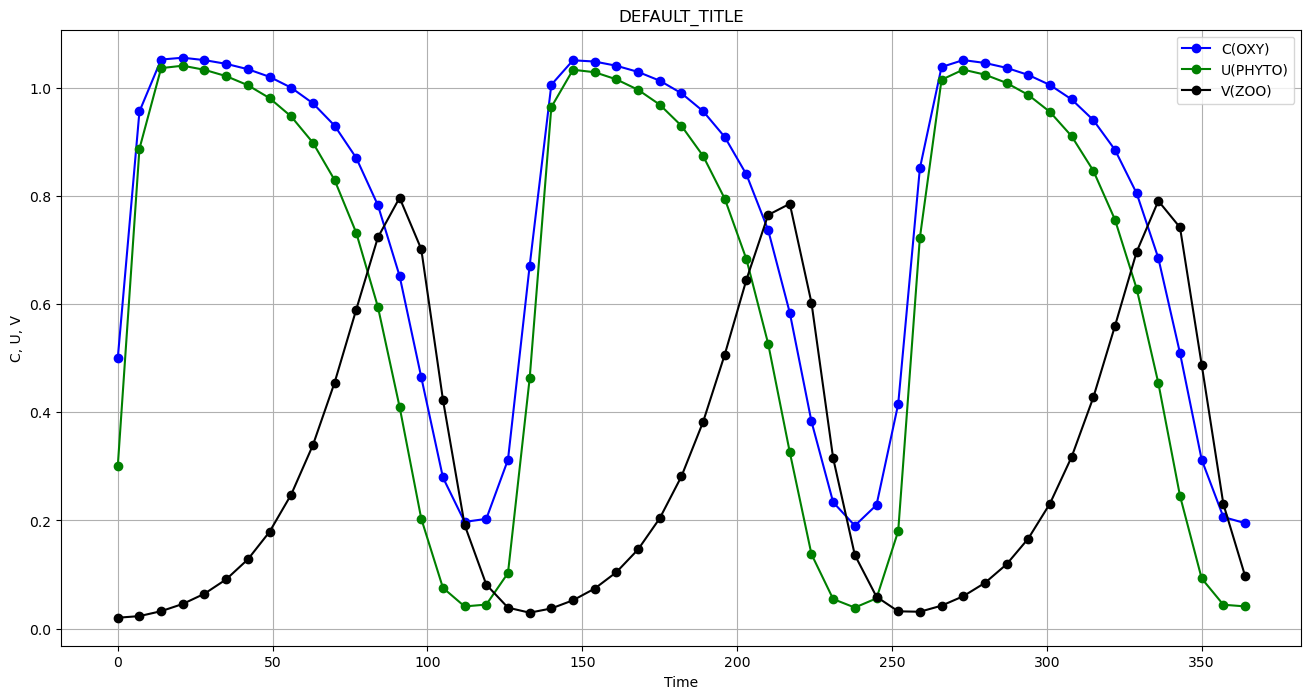

In [39]:
shower.show_solution(solution)

In [40]:
inverse_solutions = []
 
# for seed in [15, 30, 45, 60, 75]:
# for seed in [167]:
for seed in [1945994]:
    
    inverse_task_condition = InverseTaskCondition(
        solution,
        left_time_border,
        right_time_border,
        delta_time_grid,
        bounds,
        max_iter,
        popsize,
        seed,
    )
    
    inverse_task_solver = InverseTaskSolverDE(ModelWithMeasure, residual_function)
    
    start = time.time()
    print('Start inverse task solution.\n')
    
    inverse_solution = inverse_task_solver.get_solution(inverse_task_condition)
    
    execution_time = round((time.time()-start)/60, 2)
    print(f'End inverse task solution.\n Execution time: {execution_time}min' )
    inverse_solutions.append(inverse_solution)

Start inverse task solution.

differential_evolution step 1: f(x)= 3.4045
differential_evolution step 2: f(x)= 3.4045
differential_evolution step 3: f(x)= 3.4045
differential_evolution step 4: f(x)= 2.8622
differential_evolution step 5: f(x)= 2.33298
differential_evolution step 6: f(x)= 2.33298
differential_evolution step 7: f(x)= 1.11098
differential_evolution step 8: f(x)= 1.11098
differential_evolution step 9: f(x)= 1.11098
differential_evolution step 10: f(x)= 1.11098
differential_evolution step 11: f(x)= 1.11098
differential_evolution step 12: f(x)= 1.11098
differential_evolution step 13: f(x)= 1.11098
differential_evolution step 14: f(x)= 1.11098
differential_evolution step 15: f(x)= 1.11098
differential_evolution step 16: f(x)= 1.11098
differential_evolution step 17: f(x)= 1.11098
differential_evolution step 18: f(x)= 1.11098
differential_evolution step 19: f(x)= 1.11098
differential_evolution step 20: f(x)= 1.11098
differential_evolution step 21: f(x)= 1.11098
differential_evol

In [41]:
inverse_solutions

[ message: Maximum number of iterations has been exceeded.
  success: False
      fun: 1.0423779050385371
        x: [ 9.013e+00  9.754e-01 ...  3.900e-01  2.375e-01]
      nit: 50
     nfev: 125205]

In [42]:
result, data = inverse_solutions[0].x.copy(), dict(solution)

In [43]:
result

array([9.01287072, 0.97544029, 0.22379744, 0.06302107, 0.32445689,
       0.54079851, 0.062955  , 0.12016642, 0.1190656 , 0.29935661,
       0.27701614, 1.10740693, 0.15325239, 0.36930756, 0.39002436,
       0.23747597])

In [44]:
data

{'t': array([  0,   7,  14,  21,  28,  35,  42,  49,  56,  63,  70,  77,  84,
         91,  98, 105, 112, 119, 126, 133, 140, 147, 154, 161, 168, 175,
        182, 189, 196, 203, 210, 217, 224, 231, 238, 245, 252, 259, 266,
        273, 280, 287, 294, 301, 308, 315, 322, 329, 336, 343, 350, 357,
        364]),
 'y': array([[0.5       , 0.95658492, 1.05266477, 1.05602425, 1.05159536,
         1.04469641, 1.03480116, 1.02071692, 1.00057306, 0.97179767,
         0.93046275, 0.87071315, 0.78313047, 0.65235304, 0.46490502,
         0.27942581, 0.19730498, 0.20286429, 0.31230667, 0.67102443,
         1.00599303, 1.05128783, 1.04893635, 1.04116941, 1.02979638,
         1.01355763, 0.99036856, 0.95714067, 0.90937345, 0.83998339,
         0.73742027, 0.58415663, 0.38304826, 0.23361331, 0.19029446,
         0.2285374 , 0.41513969, 0.85128547, 1.03885018, 1.05166021,
         1.0463482 , 1.03725643, 1.02420854, 1.00560728, 0.97894986,
         0.94077533, 0.88564713, 0.80519742, 0.68539533, 0.509

(<Figure size 1600x800 with 1 Axes>, <Axes: xlabel='Time', ylabel='C, U, V'>)

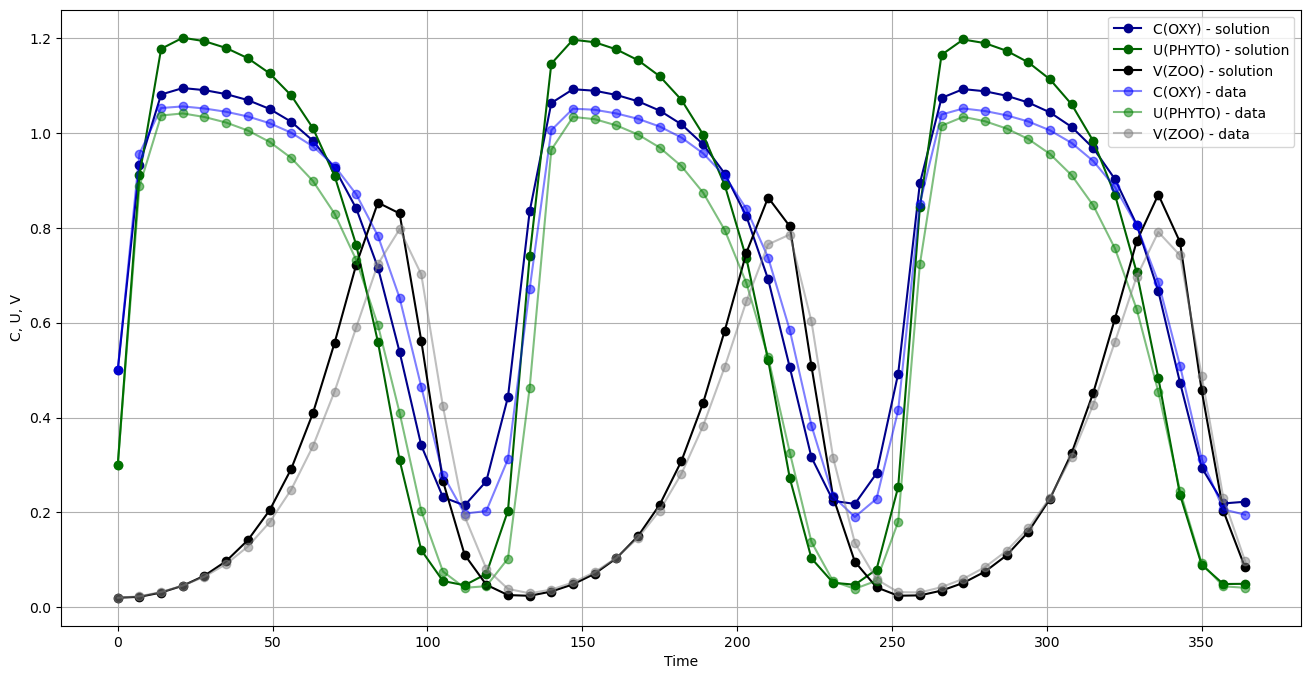

In [45]:
model = ModelWithMeasure(*result)

direct_solver = DirectTaskSolverRK45(model)

solution = direct_solver.get_solution(direct_task_condition)

shower.show_solution_and_data(solution, data)